In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
from ml_tools import *


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random

from xgboost import plot_importance
from xgboost import XGBRegressor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

/home/erichschulman/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


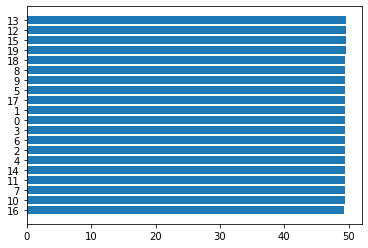

16    49.339483
10    49.392553
7     49.406812
11    49.428546
14    49.431090
4     49.440637
2     49.471620
6     49.471991
3     49.472310
0     49.473825
1     49.483554
17    49.483921
5     49.487396
9     49.489524
8     49.500381
18    49.502298
19    49.532062
15    49.532614
12    49.536328
13    49.562027
Name: score, dtype: float64
alpha_value: 500
23732.12774580237 0.4910800819300899
24388.313774529925 0.4973100529844997


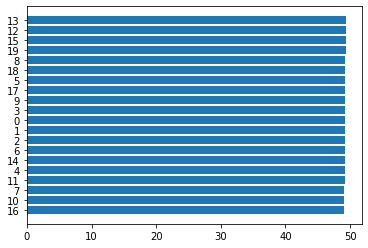

16    49.014878
10    49.103030
7     49.107189
11    49.153219
4     49.160289
14    49.162155
6     49.197351
2     49.200733
1     49.213472
0     49.213538
3     49.216816
9     49.224882
17    49.226132
5     49.233039
18    49.257703
8     49.266887
19    49.287679
15    49.287705
12    49.306124
13    49.331230
Name: score, dtype: float64
alpha_value: 750
23735.180159022075 0.4910146348840853
24391.611589155105 0.4972420786967108


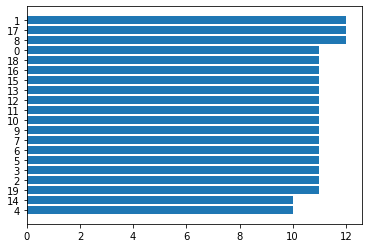

1      1
17    17
8      8
0      0
18    18
16    16
15    15
13    13
12    12
11    11
10    10
9      9
7      7
6      6
5      5
3      3
2      2
19    19
14    14
4      4
Name: features, dtype: object
26730.773550582973 0.42668879836054163
27497.025617580704 0.4332335364152531


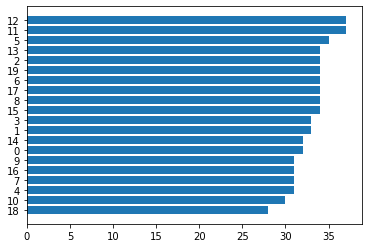

12    12
11    11
5      5
13    13
2      2
19    19
6      6
17    17
8      8
15    15
3      3
1      1
14    14
0      0
9      9
16    16
7      7
4      4
10    10
18    18
Name: features, dtype: object
27291.80933356558 0.41462406507378324
28089.5021624209 0.42102145788915635


In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m, num_relevant_cov):
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    y = (x_1.sum(axis=1) * m) + e
    X = np.column_stack((x_1, x_2))
    return pd.DataFrame(y), pd.DataFrame(X)


num_trials = 5
y,X = gen_data(5000,200,50,20)
training_test = train_test_pfold(X,y, num_trials = 5)


# Vary alpha values
a = [500,750]

for i in a: 
    run_lasso(i,training_test)
    
params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)

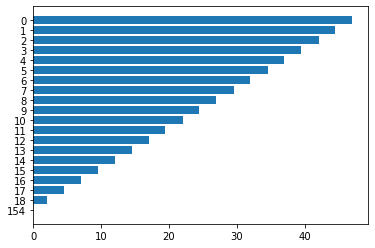

154     0.000000
18      2.043682
17      4.450078
16      7.015737
15      9.497873
14     12.003895
13     14.536592
12     17.077433
11     19.487127
10     22.032003
9      24.501676
8      26.998313
7      29.561619
6      31.980935
5      34.552259
4      37.001640
3      39.516289
2      42.066829
1      44.553237
0      47.021637
Name: score, dtype: float64
alpha_value: 500
8200.261869716971 0.4814369757566873
8229.44565009207 0.4831945200298807


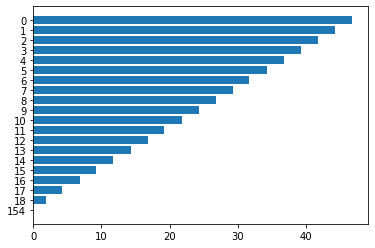

154     0.000000
18      1.820332
17      4.182081
16      6.781120
15      9.248328
14     11.755568
13     14.301759
12     16.861377
11     19.238162
10     21.792119
9      24.251389
8      26.750449
7      29.336317
6      31.709950
5      34.319250
4      36.749393
3      39.266908
2      41.831871
1      44.328056
0      46.778317
Name: score, dtype: float64
alpha_value: 750
8203.114179387358 0.4812565564849464
8232.466029812726 0.48301913645671435


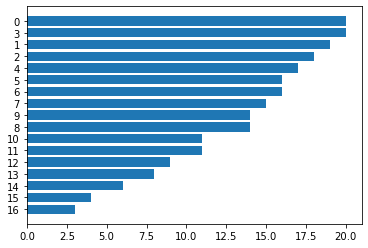

0      0
3      3
1      1
2      2
4      4
5      5
6      6
7      7
9      9
8      8
10    10
11    11
12    12
13    13
14    14
15    15
16    16
Name: features, dtype: object
8718.41872433577 0.44866078040289015
8702.308461240913 0.449440631094834


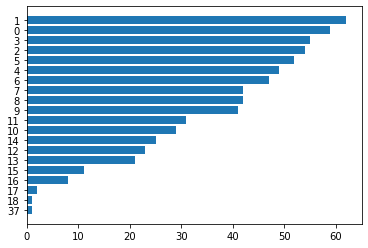

1      1
0      0
3      3
2      2
5      5
4      4
6      6
7      7
8      8
9      9
11    11
10    10
14    14
12    12
13    13
15    15
16    16
17    17
18    18
19    37
Name: features, dtype: object
8835.506916091577 0.44126097277373566
8819.622570397429 0.4419133224694316


In [3]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m, num_relevant_cov):
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    m = np.arange(num_relevant_cov)[::-1]*m/num_relevant_cov
    y = (x_1 * m).sum(axis=1) + e
    X = np.column_stack((x_1, x_2))
    return pd.DataFrame(y), pd.DataFrame(X)


num_trials = 5
y,X = gen_data(5000,200,50,20)
training_test = train_test_pfold(X,y, num_trials = 5)


# Vary alpha values
a = [500,750]

for i in a: 
    run_lasso(i,training_test)
    
params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)

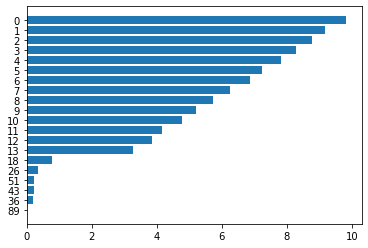

89    0.000000
36    0.181959
43    0.209413
51    0.223914
26    0.340141
18    0.783584
13    3.259493
12    3.864356
11    4.147166
10    4.784832
9     5.219317
8     5.721283
7     6.260640
6     6.868400
5     7.239475
4     7.815983
3     8.269030
2     8.776894
1     9.171666
0     9.816986
Name: score, dtype: float64
alpha_value: 750
2602.740174451249 0.493790085193325
2581.4948259009116 0.4981727452293988


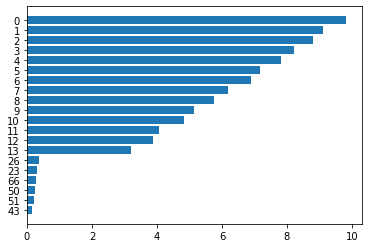

43    0.165168
51    0.212141
50    0.255350
66    0.279478
23    0.297798
26    0.367671
13    3.213254
12    3.871509
11    4.057935
10    4.816844
9     5.151130
8     5.762676
7     6.197555
6     6.905325
5     7.182375
4     7.822777
3     8.212695
2     8.799692
1     9.091872
0     9.808345
Name: score, dtype: float64
alpha_value: 1000
2604.8316587837476 0.4933723230267537
2582.2898029137305 0.498018206421904


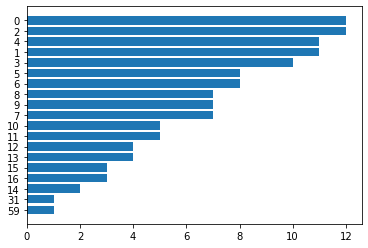

0      0
2      2
4      4
1      1
3      3
5      5
6      6
8      8
9      9
7      7
10    10
11    11
12    12
13    13
15    15
16    16
14    14
17    31
18    59
Name: features, dtype: object
2667.211051034302 0.4812536238101295
2656.6367495154173 0.48356560177619046


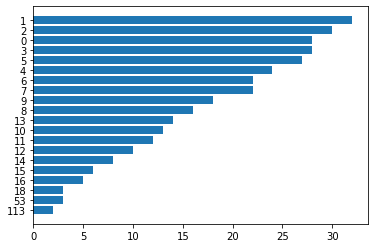

1       1
2       2
0       0
3       3
5       5
4       4
6       6
7       7
9       9
8       8
13     13
10     10
11     11
12     12
14     14
15     15
16     16
18     18
30     53
51    113
Name: features, dtype: object
2651.2028546143947 0.4843738543847955
2638.6335156136092 0.4870653234704938


In [4]:
#add correlation with certain covariates 

def gen_data(nobs, num_cov, m, num_relevant_cov, num_latent):
    #each relevant cov is generates num_cov more...
    
    #only the first n of each is relevant...
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    x_3 = np.random.normal(scale=1., size=(nobs, num_latent))
    
    #add in the latent variable
    tile_1 = np.tile(x_3,int(num_relevant_cov/num_latent))
    tile_2 = np.tile(x_3,int(num_cov/num_latent))
    x_1  = x_1 + tile_1
    x_2 = x_2 + tile_2
    
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    m = np.arange(num_relevant_cov)[::-1]*m/num_relevant_cov
    y = (x_1 * m).sum(axis=1) + e
    X = np.column_stack((x_1, x_2))
    return pd.DataFrame(y), pd.DataFrame(X)


num_trials = 5
y,X = gen_data(5000,100,10,20,2)
training_test = train_test_pfold(X,y, num_trials = 5)


# Vary alpha values
a = [750,1000]

for i in a: 
    run_lasso(i,training_test)
    
params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


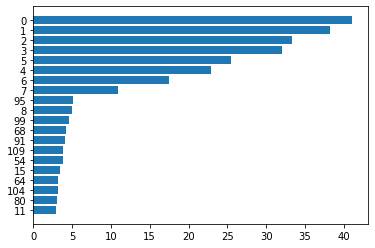

11      2.960344
80      2.986553
104     3.158818
64      3.222986
15      3.498310
54      3.774151
109     3.792299
91      4.135617
68      4.187372
99      4.628109
8       4.949694
95      5.103989
7      10.918644
6      17.439566
4      22.838453
5      25.438427
3      32.007098
2      33.281074
1      38.288400
0      41.084837
Name: score, dtype: float64
alpha_value: 750
20683.984487979633 0.12738760274716393
20307.593232601026 0.13296281208449334


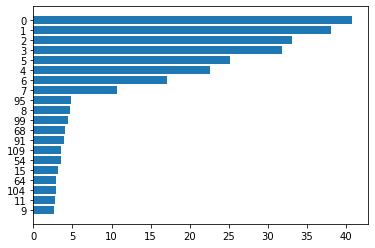

In [ ]:
%load_ext autoreload
%autoreload 2
from ml_tools import *


#add in interaction terms

def gen_data(nobs, num_cov, m, num_relevant_cov,num_latent):
    #each relevant cov is generates num_cov more...
    
    #only the first n of each is relevant...
    x_1 = np.random.normal(scale=1., size=(nobs, num_relevant_cov))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    #create all interations between x1 and x3
    x_1_interact = np.zeros((nobs,num_relevant_cov*num_latent))
    for i in range(num_relevant_cov):
        for j in range(num_latent):
            x_1_interact[:,i*j] = x_1[:,i]*x_2[:,j]
    
    e = np.random.normal(loc=0.0, scale=1.0, size=(nobs))
    
    m_coef = np.arange(num_relevant_cov)[::-1]*m/num_relevant_cov
    #m_tile = 2*m*np.ones(num_relevant_cov*num_latent) 
    m_tile = np.tile(m_coef,num_latent)/2
    y = (x_1 * m_coef).sum(axis=1) + (x_1_interact * m_tile).sum(axis=1) + e
    
    
    X = np.column_stack((x_1, x_2))
    return pd.DataFrame(y), pd.DataFrame(X)


num_trials = 5
y,X = gen_data(5000,100,50,10,20)
training_test = train_test_pfold(X,y, num_trials = 5)


# Vary alpha values
a = [750,1000]

for i in a: 
    run_lasso(i,training_test)
    
params = [(1,.2, 0.9, .9),(2,.1, 0.9, .5)]

for a in params:
    run_tree(a,training_test)